### Bayesian Models (introductory)

**John Maynard Keynes said "When the facts change, I change my mind. What do you do, sir?"**

Bayesian inference differs from more traditional statistical inference by preserving uncertainty

The fundamentally different ways of thinking about stats are Frequentists versus Bayesian. **Frequentist**, known as the more classical version of statistics, assume that probability is the long-run frequency of events. F.i., the probability of plane accidents under a frequentist philosophy is interpreted as the long-term frequency of plane accidents. This makes logical sense for many probabilities of events, but becomes more difficult to understand when events have no long-term frequency of occurrences. Consider: we often assign probabilities to outcomes of presidential elections, but the election itself only happens once! Frequentists get around this by invoking alternative realities and saying across all these realities, the frequency of occurrences defines the probability.

**Bayesians** have a more intuitive approach. Bayesians interpret a probability as measure of belief, or confidence, of an event occurring. Simply, a probability is a summary of an opinion. An individual who assigns a belief of 0 to an event has no confidence that the event will occur; conversely, assigning a belief of 1 implies that the individual is absolutely certain of an event occurring. Beliefs between 0 and 1 allow for weightings of other outcomes. This definition agrees with the probability of a plane accident example, for having observed the frequency of plane accidents, an individual's belief should be equal to that frequency, excluding any outside information. Similarly, under this definition of probability being equal to beliefs, it is meaningful to speak about probabilities (beliefs) of presidential election outcomes: how confident are you candidate A will win? (source: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb)


In Bayesian statistics, we denote $N$ as the number of instances of evidence we possess. As we gather an infinite amount of evidence, say as $N \rightarrow \infty$, our Bayesian results (often) align with frequentist results. Hence for large $N$, statistical inference is more or less objective. On the other hand, for small $N$, inference is much more unstable: frequentist estimates have more variance and larger confidence intervals. This is where Bayesian analysis excels. By introducing a prior, and returning probabilities (instead of a scalar estimate), we preserve the uncertainty that reflects the instability of statistical inference of a small $N$ dataset.

** BAYES AGAIN!

- So we denote our belief about event $Y$ as $P(Y)$ and call this quantity the **prior probability**
- We denote our updated belief as $P(Y |X )$, interpreted as the probability of $Y$ given the evidence $X$. We call the updated belief the **posterior probability** so as to contrast it with the prior probability.

Updating our belief is done via Bayes' Theorem, after its discoverer Thomas Bayes:
- $P(Y \rvert X) = \frac{P(X \rvert Y) P(Y)}{P(X)}$

**Bayesian learning for model parameters**

- Step 1) Given N data, $ D = X_{1:n} = X_{1}, X_{1}, ..., X_{n} = \left\{ X_{1}, X_{2}, ... X_{n} \right\} $ write down the expression for the likelihood $P(D\rvert\theta)$ where likelihood is the probability of the model parameters, given the data. i.e. **how we think our data is distributed**
- step 2) Specify a prior $P(\theta)$ (**what we think about $\theta$ before we have seen any data**). This indicates: 
    - A) the **uncertainty of he parameters**, thereby indicating that our beliefs in the parameters are subjective. There is no such thing as a $\theta_{0}$ in case of $\inf$ and $\theta$ is a random variable. For maximum likelihood $\theta$ is NOT a random variable but the randomness is in the data. In Bayesian Inference, we are putting a distribution to the $\theta$, thereby acknowledging there is uncertainty.
    
    -B) the prior distribution can also indicate a minimal belief. We choose the priro that encodes my beliefs about the problem. By new observations are then updates beliefs about the problem. 
    
    C) By every new observation we update our belief and that will give the **posterior distribution**
    $P(\theta \rvert D) = \frac {P(D \rvert \theta) \hspace{2mm} P(\theta)} {p(D)} \propto \hspace{1mm} P(D \rvert \theta)P(\theta)$ calculated by multiplying the likelihood x the parameters.

In [409]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
import sys
sys.path.insert(0, 'helper_functions/')
from utilities import remove_borders
import bayesian_helpers as bh

figsize=[12,6]
PATH = 'data/'
PATH_IMAGE = 'images/'

In the `helper_functions` there is a `bayesian_helpers.py` scripts to start playing with some coin-toss examples. 

- First function is a `running_proportion_sim` function that simulates coin tosses and visualizes a proportion of heads. As N trials grows in size we see the proportion of heads is close to 50%, which we expect with a fair coin.

- second function is `running_posterior_probabilities_sim` where we see the posterior probabilities that are represented by the curves, and our uncertainty is proportional to the width of the curve.

An interesting question to ask is how our inference changes as we observe more and more data? More specifically, what do our posterior probabilities look like when we have little data, versus when we have lots of data. A plot that visualizes this. (inspired by  same notebook mentioned in the beginning)

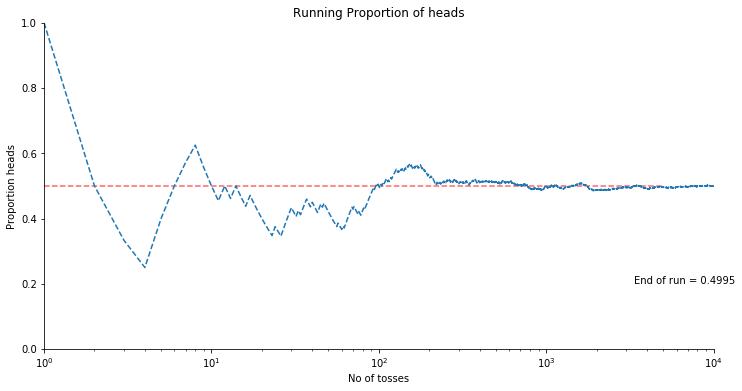

In [258]:
# function running_proportion_sim
bh.running_proportion_sim(N=10000, random_seed=False)

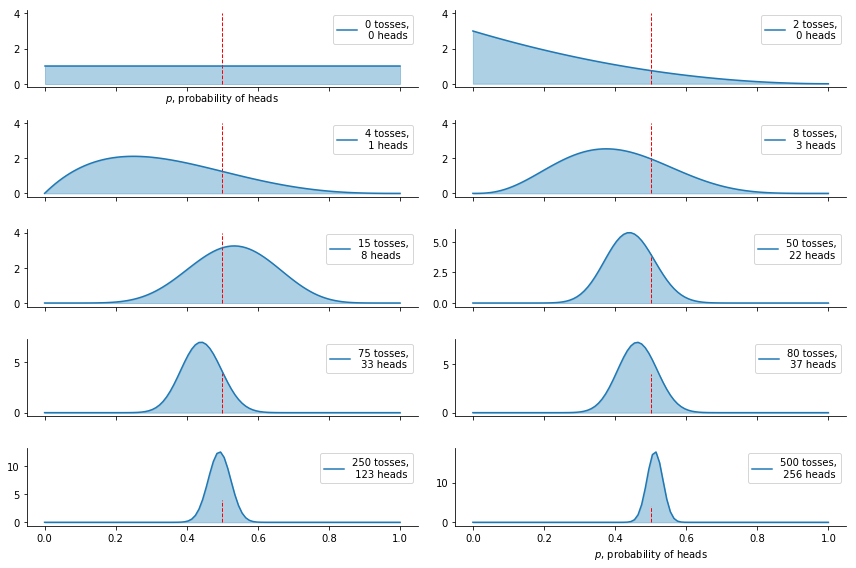

In [270]:
# make sure the n_trials list has an even number of elements 
_ = bh.running_posterior_probabilities_sim(n_trials=[0, 2, 4, 8, 15, 50, 75,80,250,500])

Recall:
**1) Discrete random variables** may only assume values on a specified list. Things like populations, and number of votes are all discrete random variables. Very appropriate for **count data**. 
When $Z$ is discrete, then its distribution is called a **probability mass function**, which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$

```
poi = stats.poisson
poi.pmf
```

We say $Z$ is Poisson-distributed if:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the intensity of the Poisson distribution.

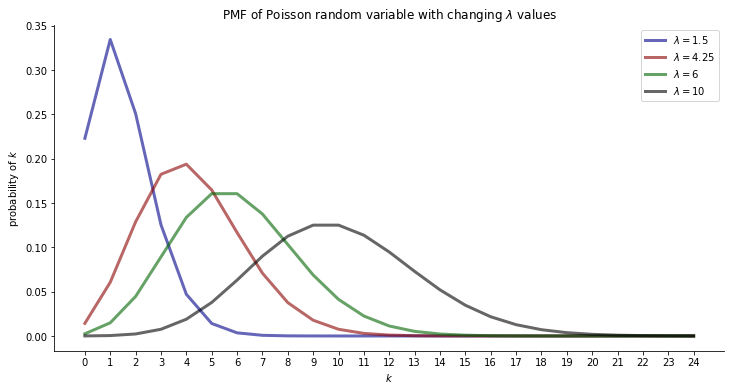

In [311]:
a = np.arange(25)
poi = stats.poisson
lambda_ = [1.5, 4.25, 6, 10]
colours = ['darkblue', 'darkred', 'darkgreen', 'black']
fig, ax  = plt.subplots(figsize=[12,6])
for i, l in enumerate(lambda_):
    ax.plot(a, poi.pmf(a, lambda_[i]), color=colours[i],
        label='$\lambda = {}$'.format(lambda_[i]), alpha=0.60, lw='3')
    ax.set(xticks = a, ylabel = "probability of $k$", xlabel = "$k$", 
      title = "PMF of Poisson random variable with changing $\lambda$ values")
    ax.legend()
    remove_borders(ax)

Recall:
**2) continuous random variables** have a **probability density function**. Continuous random variable can take on arbitrarily exact values. For example, temperature, speed, time. 

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

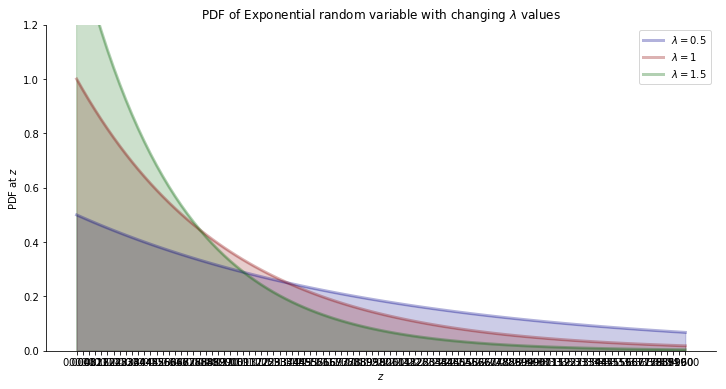

In [328]:
a = np.linspace(0, 4, 100)
poi = stats.expon
lambda_ = [0.5, 1, 1.5]

fig, ax  = plt.subplots(figsize=figsize)
for i, l in enumerate(lambda_):
    ax.plot(a, poi.pdf(a, scale=1./l), color=colours[i],
        label='$\lambda = {}$'.format(lambda_[i]), alpha=0.30, lw='3')
    ax.fill_between(a, poi.pdf(a, scale=1./l), color=colours[i], alpha=.20)
    ax.set(xticks = a, ylabel = 'PDF at $z$', xlabel = '$z$', ylim = (0,1.2),
      title = "PDF of Exponential random variable with changing $\lambda$ values")
    ax.legend()
    remove_borders(ax)

### Case 1: whatsapp messages

We have a series of daily text-message counts from a user of your system. The data, plotted over time, appears in the chart below. You are curious to know if the user's whatsapp-messaging habits have changed over time, either gradually or suddenly.

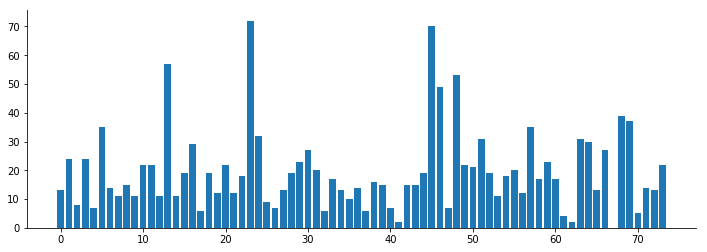

In [347]:
count_data = np.loadtxt(PATH + 'whatsapp_messages.csv')
n_count_data = len(count_data)
fig, ax  = plt.subplots(figsize=[12,4])
ax.bar(np.arange(len(count_data)), count_data)
remove_borders(ax)

How to model this? 

- "what is the best random variable to describe this count data?" We deal with count data so *Poisson random variable* is appropriate. Denoting day $i$'s whatsapp-message count by $C_i$ : $$ C_i \sim \text{Poisson}(\lambda)  $$
- Poisson dsitributions have a $\lambda$ parameter that is unknown. But to use Bayesian inference, we need to assign prior probabilities to the different possible values of $\lambda$. What would be good prior probability distributions for $\lambda_1$ and $\lambda_2$? Needs to be positive number, so:

- What is a good distribution for the two $\lambda$s? The exponential is good, as it assigns probabilities to positive real numbers. Well the exponential distribution has a parameter too, call it $\alpha$. In other words: **exponential distribution** provides a continuous density function for positive numbers, so it might be a good choice for modeling $\lambda_i$. 
- Exponential distributions take their own hyper-parameter **$\alpha$**.
$$\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}$$

- How to set $\alpha$ then? At this point, we could continue and assign a distribution to $\alpha$, but it's better to stop once we reach a set level of ignorance: whereas we have a prior belief about $\lambda$, ("it probably changes over time", "it's likely between 10 and 30", etc.), we don't really have any strong beliefs about $\alpha$. So it's best to stop here. We think that the $\lambda$s are between 10-30, so if we set $\alpha$ really low (corresponding to larger probabilities on high values) we are not reflecting our prior well. Similar, a too-high alpha misses our prior belief as well. A good idea for $\alpha$ as to reflect our belief is to set the value so that the mean of $\lambda$, given $\alpha$, is equal to our observed mean.

- So, we have a suspicion that there are two $\lambda$ values, one for the earlier behaviour and one for the later behaviour. We don't know when the behaviour switches though, but call the switchpoint $\tau$ What about $\tau$? (tau) or the moment the user's whatsapp-messaging habits began to change (if ever). Because of the noisiness of the data, it's difficult to pick out a priori when $\tau$ might have occurred. Instead, we can assign a uniform prior belief to every possible day. (We have no expert opinion of when $\tau$ might have occurred. So we will suppose $\tau$ is from a discrete uniform distribution over the entire timespan). This is equivalent to saying:

$$\begin{align}
&\tau \sim \text{DiscreteUniform(1,70) }\\
&\Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}$$

- It doesn't matter how are overall prior distributions for the unknown variables look like!

- use **PYMC3** to represent the model's components ($\tau, \lambda_1, \lambda_2$ ) as variables.

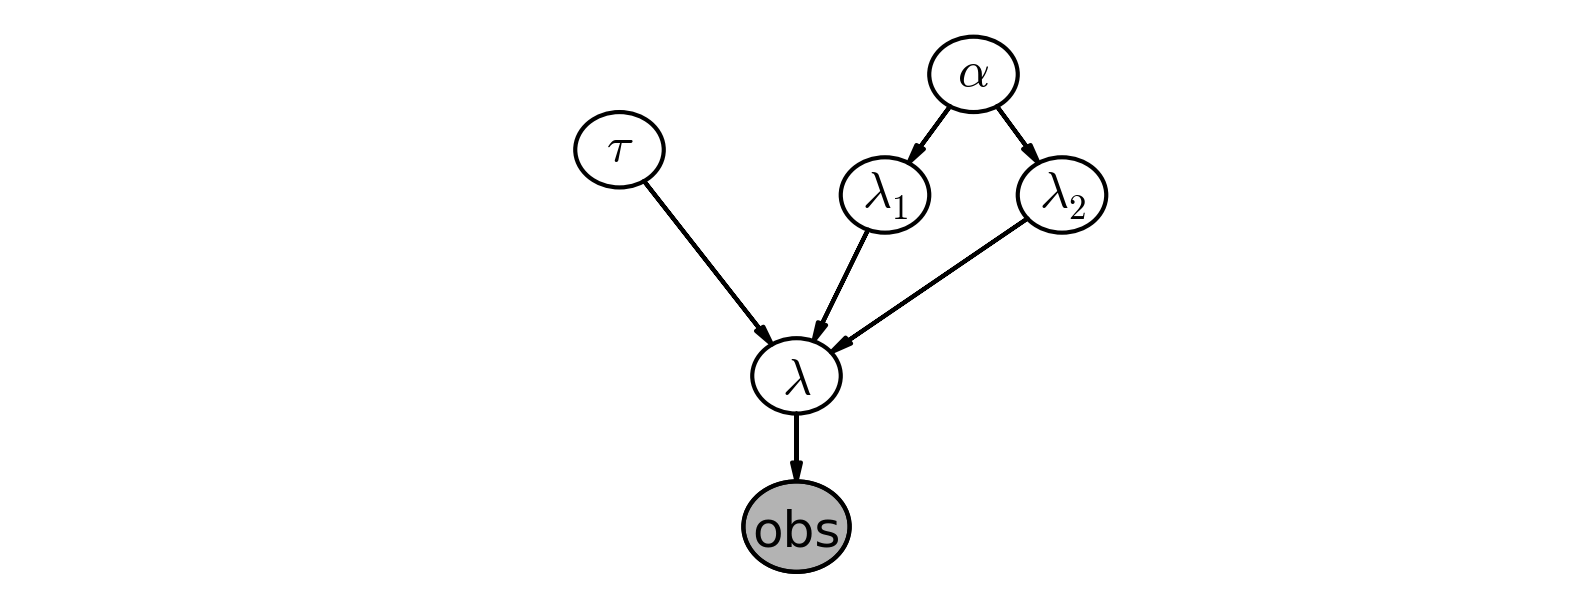

In [410]:
from IPython.display import Image
Image(PATH_IMAGE + 'whatsapp_message_parameters.png')

In [348]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # count_data =  whatsapp counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

Let's create a new function **lambda_**, to be thought of as a random variable. The switch() function assigns lambda_1 or lambda_2 as the value of `lambda_`, depending on what side of tau we are on. The values of lambda_ up until tau are lambda_1 and the values afterwards are lambda_2.

Note that because lambda1, lambda2 and tau are random, lambda_ will be random. We are not fixing any variables yet.

In [342]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2) 

In [343]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

In [371]:
type(observation)

pymc3.model.ObservedRV

In [344]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step) # traces are samples 

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]
Sampling 2 chains: 100%|██████████| 30000/30000 [00:10<00:00, 2740.84draws/s]
/home/diederik/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The number of effective samples is smaller than 25% for some parameters.


In [345]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

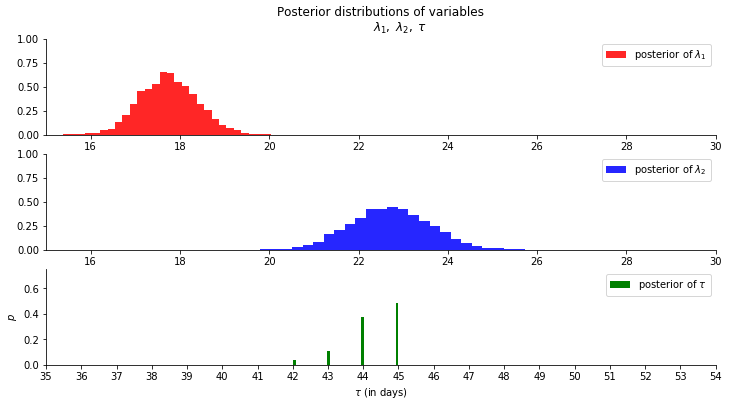

In [369]:
fig, ax = plt.subplots(3,1, figsize=figsize)

ax[0].hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
           label="posterior of $\lambda_1$", color='red', density=True)
ax[0].legend(loc="best")
ax[0].set(title = r"""Posterior distributions of variables
          $\lambda_1,\;\lambda_2,\;\tau$""", xlim = [15, 30], ylim=[0,1],
          xlabel = "$\lambda_1$ value")

ax[1].hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
          label="posterior of $\lambda_2$", color='blue', density=True)
ax[1].legend(loc="best")
ax[1].set(xlim = [15, 30], ylim=[0,1], xlabel = "$\lambda_2$ value")

w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
ax[2].hist(tau_samples, bins=n_count_data, alpha=1,
           label=r'posterior of $\tau$',color='green', weights=w, rwidth=2.)
_ = ax[2].set(xticks = (np.arange(n_count_data)))
ax[2].legend(loc='best')
ax[2].set(ylim = [0, .75], xlim = [35, len(count_data)-20], 
          xlabel = r'$\tau$ (in days)', ylabel = '$p$');
for i, x in enumerate(ax.flatten()):
    remove_borders(ax[i])

**Interpretation**

Bayesian methodologies return distributions. Hence we now have distributions to describe the unknown $\lambda$s and $\tau$. Immediately, we can see the **uncertainty** in our estimates: the wider the distribution, the less certain our posterior belief should be. We can also see what the plausible values for the parameters are: $\lambda_1$ is around 18 and $\lambda_2$ is around 23. The posterior distributions of the two $\lambda$s are clearly distinct, indicating that it is indeed likely that there was a change in the user's whatsapp-message behaviour.

What other observations can we make? Notice also that the posterior distributions for the $\lambda$s do not look like exponential distributions, even though our priors for these variables were exponential. In fact, the posterior distributions are not really of any form that we recognize from the original model. But that's OK! This is one of the benefits of taking a computational point of view. If we had instead done this analysis using mathematical approaches, we would have been stuck with an analytically intractable (and messy) distribution. Our use of a computational approach makes us indifferent to mathematical tractability.

Our analysis also returned a distribution for $\tau$. Its posterior distribution is very different because it is a discrete random variable (no assigning of probabilities to intervals) We can see that near day 45, there was a 50% chance that the user's behaviour changed. Had no change occurred, or had the change been gradual over time, the posterior distribution of $\tau$ would have been more spread out, reflecting that many days were plausible candidates for $\tau$. By contrast, in the actual results we see that only three or four days make any sense as potential transition points.

Useful property of the Poisson distribution is that its expected value is equal to its parameter, so if we need to answer "what is the expected number of texts at day $t, \; 0 \le t \le 70$ we can ask: "what is the expected value of $\lambda$ at time $t$?" 

the "message count" random variable is Poisson distributed,and therefore lambda (the poisson parameter) is the expected value of "whatsapp message count"

In [389]:
# tau contained 2 chains of 10000 traces (samples) 
tau_samples.shape
print ('shape of tau_samples: {}'.format(tau_samples.shape))
print ('shape of count_data: {}'.format(count_data.shape))

shape of tau_samples: (20000,)
shape of count_data: (74,)


In [392]:
N = tau_samples.shape[0]
expected_whatsapp_message_per_day = np.zeros(n_count_data)

In [400]:
expected_whatsapp_message_per_day

array([17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74898328,
       17.74942869, 17.75160442, 17.92258901, 18.41139516, 20.25703306,
       22.70589267, 22.70589267, 22.70589267, 22.70589267, 22.70589267,
       22.70589267, 22.70589267, 22.70589267, 22.70589267, 22.70589267,
       22.70589267, 22.70589267, 22.70589267, 22.70589267, 22.70589267,
       22.70589267, 22.70589267, 22.70589267, 22.70589267, 22.70589267,
       22.70589267, 22.70589267, 22.70589267, 22.70589267, 22.70

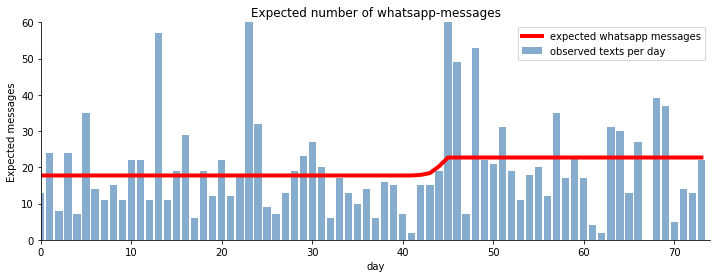

In [407]:
for d in range(0, n_count_data):
    ix = d < tau_samples
    expected_whatsapp_message_per_day[d] = (lambda_1_samples[ix].sum() + 
                                             lambda_2_samples[~ix].sum()) / N
    
fig, ax = plt.subplots(figsize=[12,4])
ax.plot(range(n_count_data), expected_whatsapp_message_per_day, lw=4, color='red',
         label='expected whatsapp messages')
ax.set(xlim = (0, n_count_data), ylim = (0, 60), 
       xlabel = 'day', ylabel = 'Expected messages', 
       title = 'Expected number of whatsapp-messages')
ax.bar(np.arange(len(count_data)), count_data, color='steelblue', alpha=0.65,
        label='observed texts per day')
ax.legend(loc='best')
remove_borders(ax)

### simulation of different results

What is cool is that we create new datasets by retelling the story. For example, if we reverse the above steps, we can simulate a new outcome. The steps:

- 1)  Specify when the user's behaviour switches by sampling from $\text{DiscreteUniform}(0, 80)$:
- 2.1) set an alpha: best practise for $\alpha$ as to reflect our belief is to set the value so that the mean of $\lambda$, given $\alpha$, is equal to our observed mean.
- 2.1) Draw $\lambda_1$ and $\lambda_2$ from an $\text{Exp}(\alpha)$ distribution
- 3)  For days before $\tau$, represent the user's received Whatsapp count by sampling from $\text{Poi}(\lambda_1)$, and sample from  $\text{Poi}(\lambda_2)$ for days after $\tau$. 

In [461]:
def simulation_whatsapp_messages():
    # step 1
    tau = stats.randint.rvs(0,80)
    #step 2.1
    alpha = 1/count_data.mean()
    #step 2.2
    lambda_1, lambda_2 = stats.expon.rvs(scale = 1/alpha, size=2)
    # step 3
    data = np.r_[stats.poisson.rvs(mu = lambda_1, size= tau),
                 stats.poisson.rvs(mu = lambda_2, size= 80 - tau)]
    # plot
    fig, ax = plt.subplots(figsize=[12,4])
    ax.bar(np.arange(80), data, color='steelblue')
    ax.bar(tau - 1, data[tau-1], color='red', label = 'behavior changed')
    ax.set(xlim = (-1,80))
    remove_borders(ax)
    
    return ax  

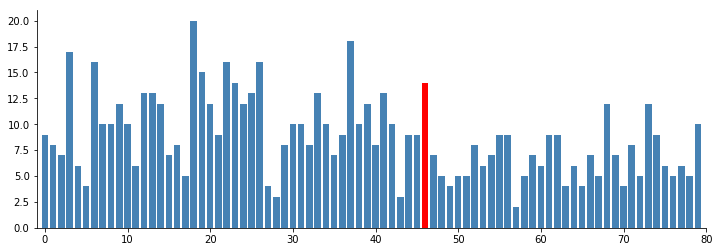

In [467]:
simulation_whatsapp_messages()

In [469]:
### Case 2 : A/B testing of a site
